#Import các thư viện cần thiết


In [1]:
import numpy as np
import pickle
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
from keras.models import Model
from keras.layers import Activation, Dropout, UpSampling2D, concatenate, Input
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.models import Sequential

#Mount drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load train images và labels


In [4]:
train_images = pickle.load(open("/content/drive/MyDrive/Dataset_For_CV/full_CNN_train.p", "rb" ))

labels = pickle.load(open("/content/drive/MyDrive/Dataset_For_CV/full_CNN_labels.p", "rb" ))

train_images = np.array(train_images)
print(len(train_images))
labels = np.array(labels)

labels = labels /255
print(labels.shape)
train_images, labels = shuffle(train_images, labels)

X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)
print(len(X_train))

12764
(12764, 80, 160, 1)
11487


#Show labels


(-0.5, 159.5, 79.5, -0.5)

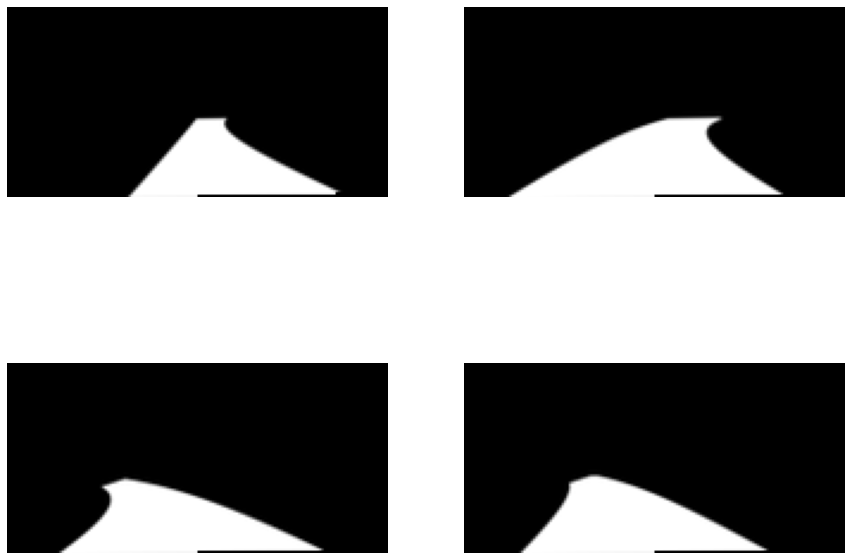

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(np.array(labels[2]).reshape(80,160), cmap='gray')
plt.axis('off')

  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(np.array(labels[3]).reshape(80,160), cmap='gray')
plt.axis('off')

  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(np.array(labels[4]).reshape(80,160), cmap='gray')
plt.axis('off')

  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(np.array(labels[5]).reshape(80,160), cmap='gray')
plt.axis('off')


#Print layer name


In [ ]:
alLayers = model.layers
for count, layer in enumerate(alLayers):
  print("Layer no." + str(count) + ": " + layer.name)

Layer no.0: batch_normalization_1
Layer no.1: Conv1
Layer no.2: Conv2
Layer no.3: max_pooling2d_3
Layer no.4: Conv3
Layer no.5: dropout_10
Layer no.6: Conv4
Layer no.7: dropout_11
Layer no.8: Conv5
Layer no.9: dropout_12
Layer no.10: max_pooling2d_4
Layer no.11: Conv6
Layer no.12: dropout_13
Layer no.13: Conv7
Layer no.14: dropout_14
Layer no.15: max_pooling2d_5
Layer no.16: up_sampling2d_3
Layer no.17: Deconv1
Layer no.18: dropout_15
Layer no.19: Deconv2
Layer no.20: dropout_16
Layer no.21: up_sampling2d_4
Layer no.22: Deconv3
Layer no.23: dropout_17
Layer no.24: Deconv4
Layer no.25: dropout_18
Layer no.26: Deconv5
Layer no.27: dropout_19
Layer no.28: up_sampling2d_5
Layer no.29: Deconv6
Layer no.30: Final


#Visualize filters

Conv 1
Conv1
(3, 3, 3, 8)


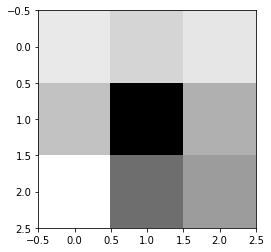

In [ ]:
print("Conv 1")
filters1, biases = model.layers[1].get_weights()
print(alLayers[1].name)
print(filters1.shape)
for i in range(0, 8):
  plt.imshow(filters1[:, :, 0, i], cmap='gray')

Conv 2
Conv2
(3, 3, 8, 16)


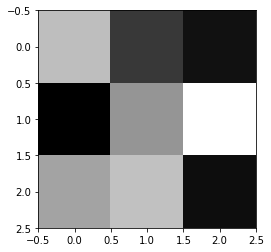

In [ ]:
print("Conv 2")
filters2, biases = model.layers[2].get_weights()
print(alLayers[2].name)
print(filters2.shape)
for i in range(0, 8):
  plt.imshow(filters2[:, :, 0, i], cmap='gray')

Conv 3
Conv3
(3, 3, 16, 16)


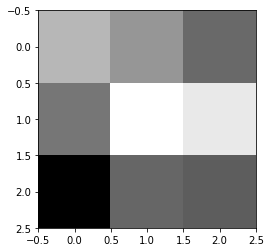

In [ ]:
print("Conv 3")
filters4, biases = model.layers[4].get_weights()
print(alLayers[4].name)
print(filters4.shape)
for i in range(0, 8):
  plt.imshow(filters4[:, :, 0, i], cmap='gray')

In [ ]:
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle("Số lượng bộ lọc của lớp tích chập đầu tiên", fontsize=10)
cols = 8
rows = 1
n_filters = cols * rows
for i in range(1, n_filters + 1):
  f = filters1[:, :, :, i - 1]
  fig1 =  plt.subplot(rows, cols, i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:, :, 0], cmap='gray')
plt.show()

In [ ]:
conv_layer_index = [1, 2, 4]
outputs = []

for i in conv_layer_index:
  print(i)
  outputs.append(model.layers[i].output)
print(outputs)

1
2
4
[<KerasTensor: shape=(None, 77, 157, 16) dtype=float32 (created by layer 'Conv1')>, <KerasTensor: shape=(None, 74, 154, 16) dtype=float32 (created by layer 'Conv2')>, <KerasTensor: shape=(None, 34, 74, 32) dtype=float32 (created by layer 'Conv3')>]


(80, 160, 3)
(1, 80, 160, 3)
1/1 [==============================] - 0s 54ms/step
(1, 74, 154, 16)


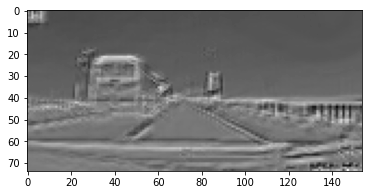

In [ ]:
from keras.models import Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model_short = Model(inputs=model.inputs, outputs = outputs)


imagePath = '/content/DRIVING IN HANOI CITY 2021 - The ring road system of Hanoi  _Moment3.jpg'

img = image.load_img(imagePath, target_size=(80, 160))

imgNp = image.img_to_array(img)

imgNp = imgNp / 255.0

print(imgNp.shape)

imgToModel = np.expand_dims(imgNp, axis=0)
print(imgToModel.shape)


feature_output = model_short.predict(imgToModel)

# feature_one_layer = feature_output[1]
# print(feature_one_layer.shape)

# plt.imshow(feature_one_layer[0][:, :, 15])
# plt.show()

feature_one_layer = feature_output[1]
print(feature_one_layer.shape)

plt.imshow(feature_one_layer[0][:, :, 0], cmap='gray')
plt.show()

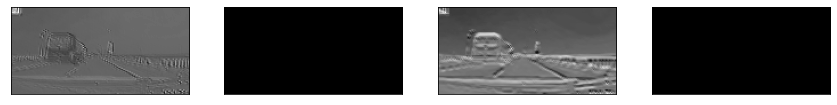

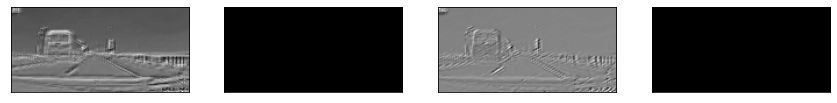

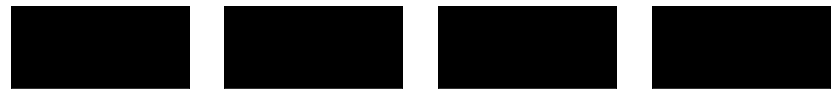

In [ ]:
cols = 8
rows = 2
layer_index = 0

for ftr in feature_output:
  fig = plt.figure(figsize=(30, 30))
  layerDisplayNumber = conv_layer_index[layer_index]

  for i in range(1,5):
    fig = plt.subplot(rows, cols, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0,  :,  :,  i - 1], cmap='gray')
  plt.show()
  layer_index += 1


In [ ]:
import tensorflow as tf

vgg_inputs = model.input
vgg_layers = model.layers
layer_names = [layer.name for layer in model.layers]
vgg_layer_outputs = [ layer.output for layer in vgg_layers]
feature_model = Model(inputs=vgg_inputs, outputs=vgg_layer_outputs)
tf.keras.utils.plot_model(feature_model, 'model.png', show_shapes = True)

In [ ]:
extracted_features = feature_model.predict(imgToModel)

1/1 [==============================] - 1s 1s/step



 f2.shape:   (1, 37, 77, 16) Layer:  max_pooling2d_3


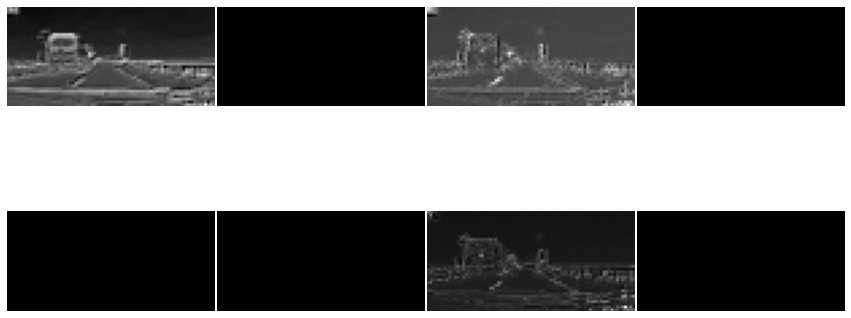

In [ ]:
f1 = extracted_features[3]
print('\n f2.shape:  ', f1.shape, 'Layer: ' , layer_names[3])
imgs = f1[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(8):
  ax = plt.subplot(4, 4, n + 1)
  plt.imshow(imgs[:, :, n], cmap='gray')
  plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

#Load pre-train model

In [ ]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/Custom_CNN.h5')

#Visualize output layer

0 Layer:  batch_normalization_1 Layer shape:  (1, 80, 160, 3)


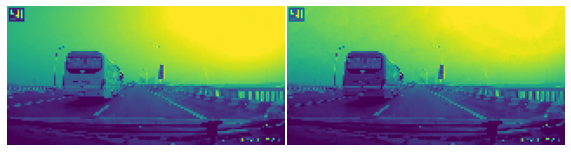

1 Layer:  Conv1 Layer shape:  (1, 77, 157, 16)


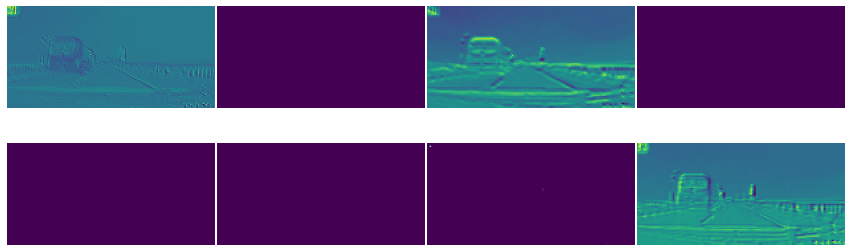

2 Layer:  Conv2 Layer shape:  (1, 74, 154, 16)


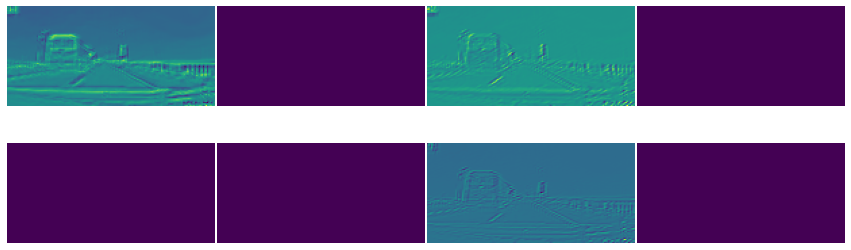

3 Layer:  max_pooling2d_3 Layer shape:  (1, 37, 77, 16)


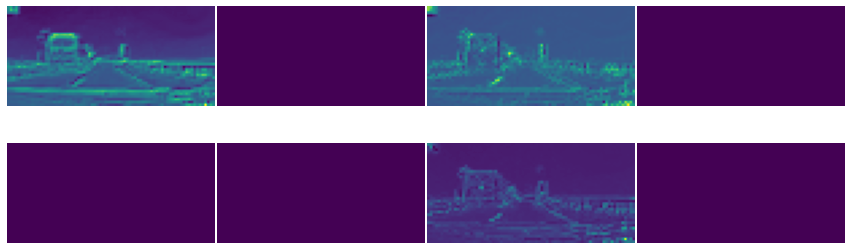

4 Layer:  Conv3 Layer shape:  (1, 34, 74, 32)


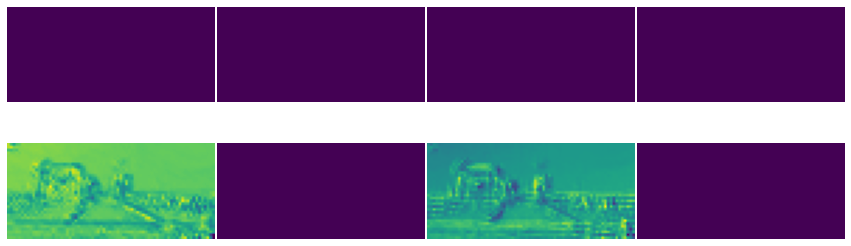

5 Layer:  dropout_10 Layer shape:  (1, 34, 74, 32)


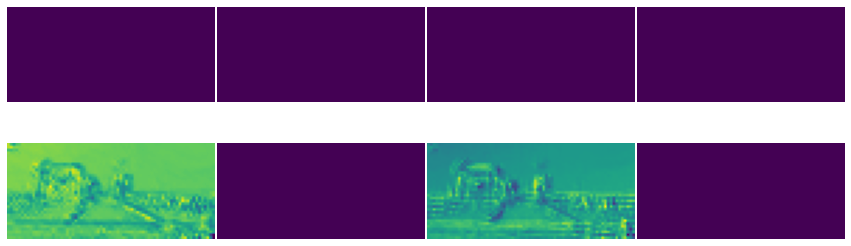

6 Layer:  Conv4 Layer shape:  (1, 31, 71, 32)


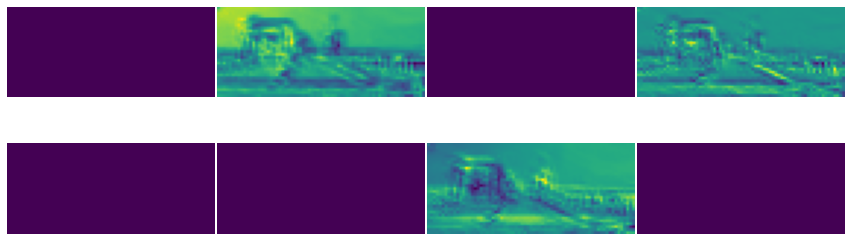

7 Layer:  dropout_11 Layer shape:  (1, 31, 71, 32)


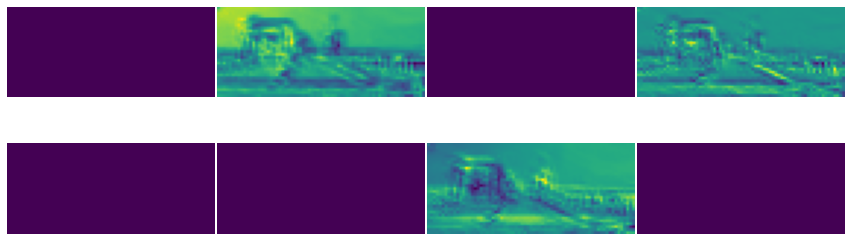

8 Layer:  Conv5 Layer shape:  (1, 28, 68, 32)


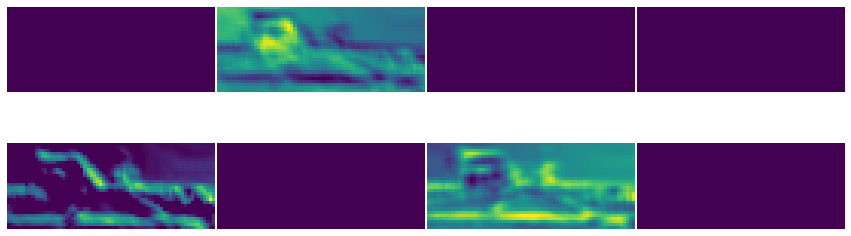

9 Layer:  dropout_12 Layer shape:  (1, 28, 68, 32)


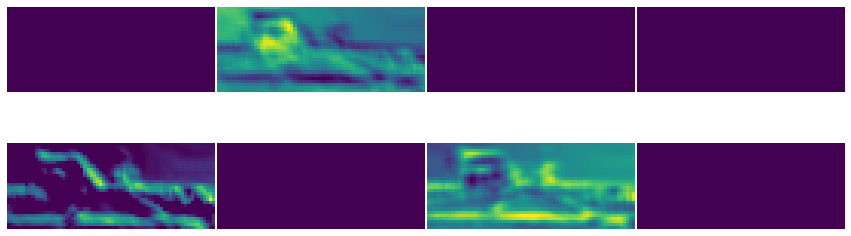

10 Layer:  max_pooling2d_4 Layer shape:  (1, 14, 34, 32)


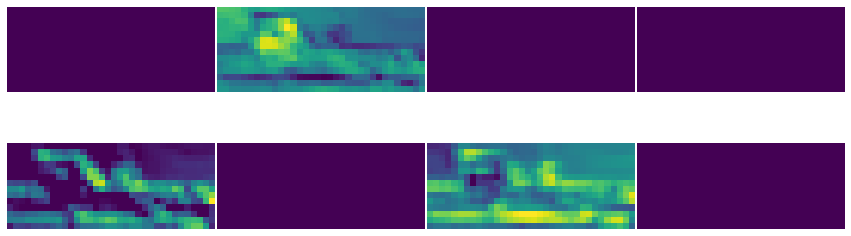

11 Layer:  Conv6 Layer shape:  (1, 11, 31, 64)


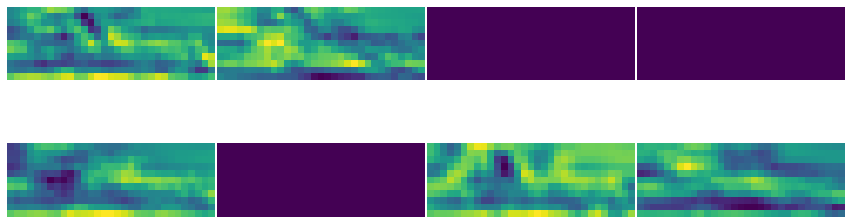

12 Layer:  dropout_13 Layer shape:  (1, 11, 31, 64)


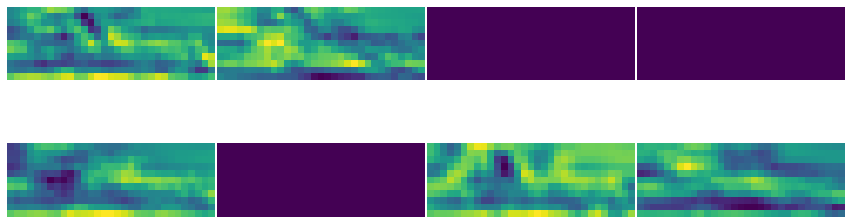

13 Layer:  Conv7 Layer shape:  (1, 8, 28, 64)


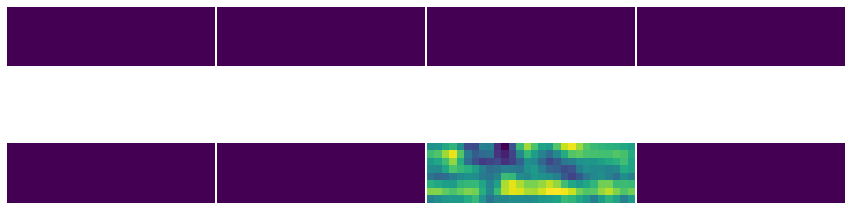

14 Layer:  dropout_14 Layer shape:  (1, 8, 28, 64)


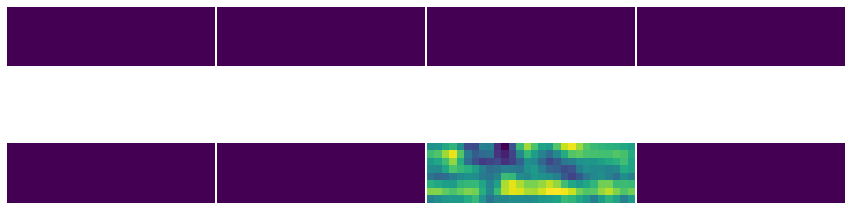

15 Layer:  max_pooling2d_5 Layer shape:  (1, 4, 14, 64)


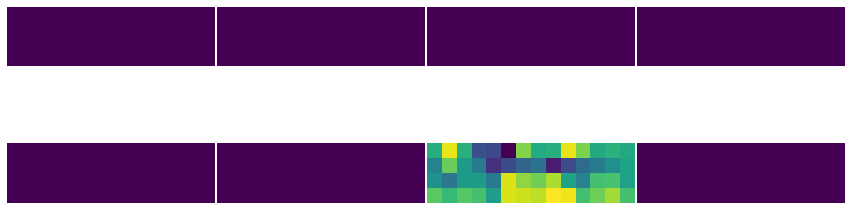

16 Layer:  up_sampling2d_3 Layer shape:  (1, 8, 28, 64)


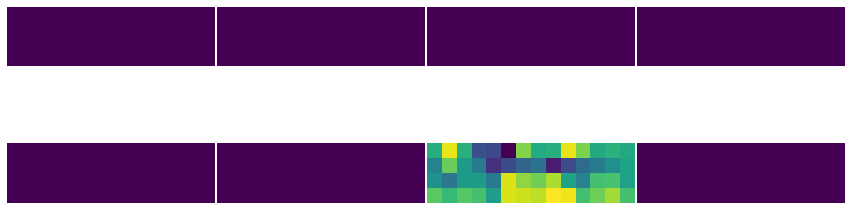

17 Layer:  Deconv1 Layer shape:  (1, 11, 31, 64)


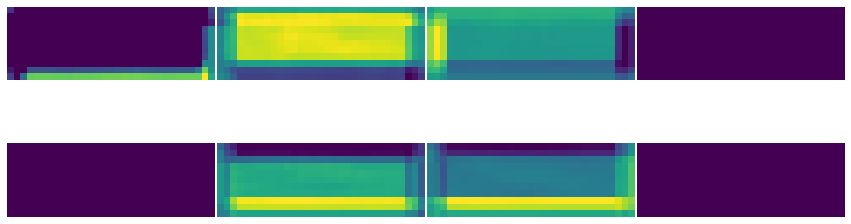

18 Layer:  dropout_15 Layer shape:  (1, 11, 31, 64)


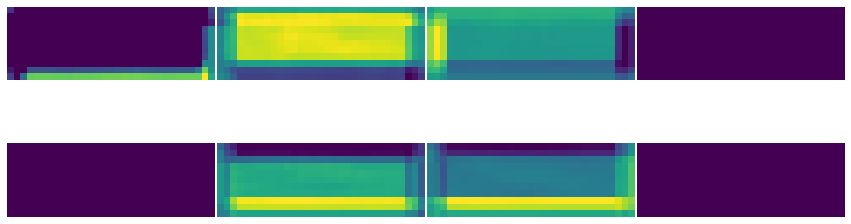

19 Layer:  Deconv2 Layer shape:  (1, 14, 34, 64)


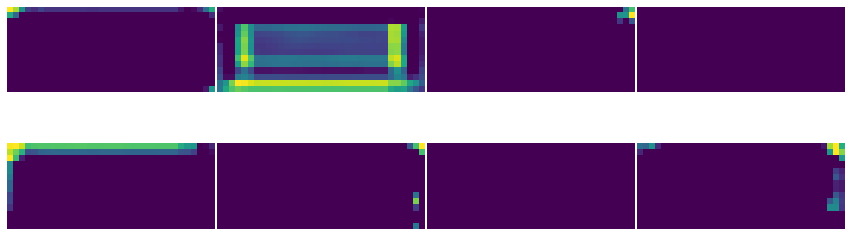

20 Layer:  dropout_16 Layer shape:  (1, 14, 34, 64)


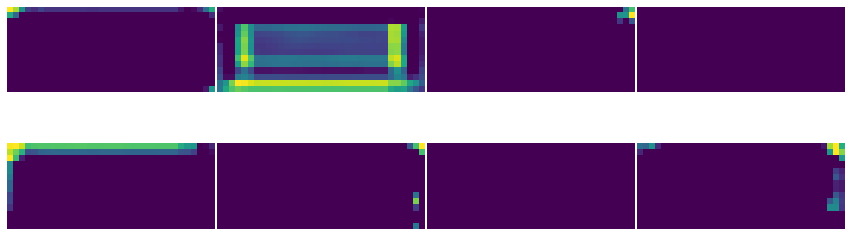

21 Layer:  up_sampling2d_4 Layer shape:  (1, 28, 68, 64)


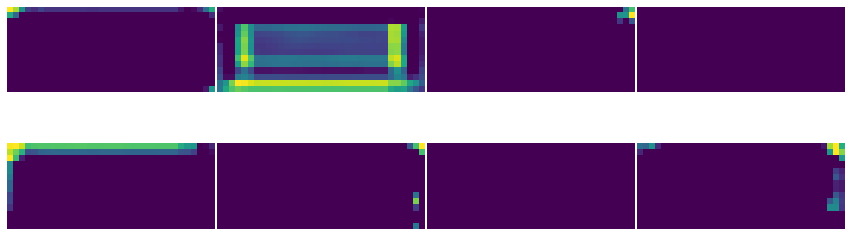

22 Layer:  Deconv3 Layer shape:  (1, 31, 71, 32)


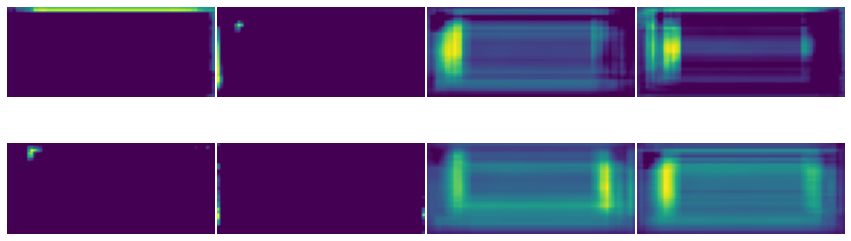

23 Layer:  dropout_17 Layer shape:  (1, 31, 71, 32)


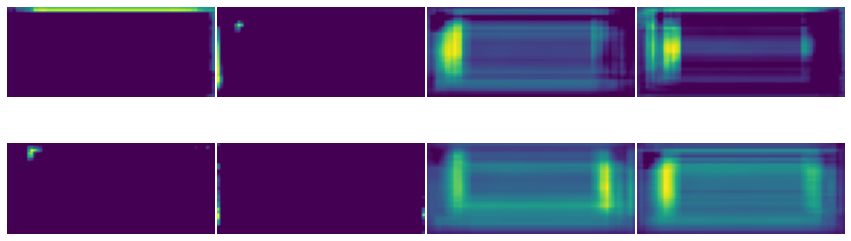

24 Layer:  Deconv4 Layer shape:  (1, 34, 74, 32)


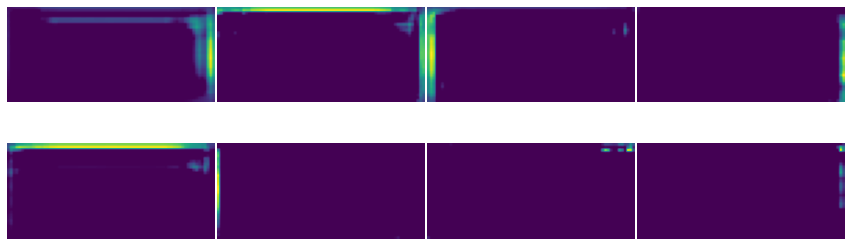

25 Layer:  dropout_18 Layer shape:  (1, 34, 74, 32)


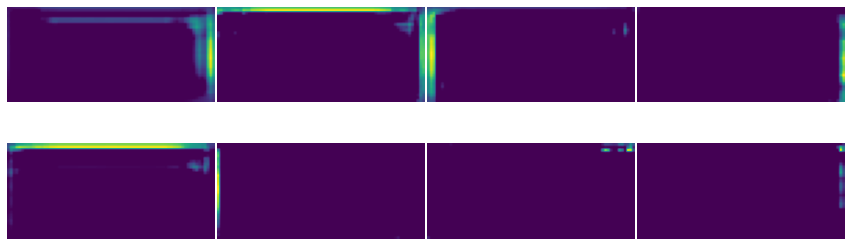

26 Layer:  Deconv5 Layer shape:  (1, 37, 77, 16)


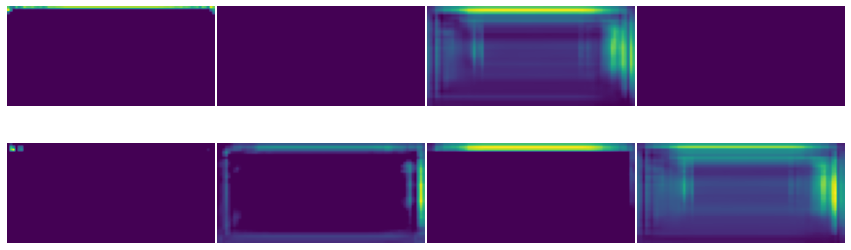

27 Layer:  dropout_19 Layer shape:  (1, 37, 77, 16)


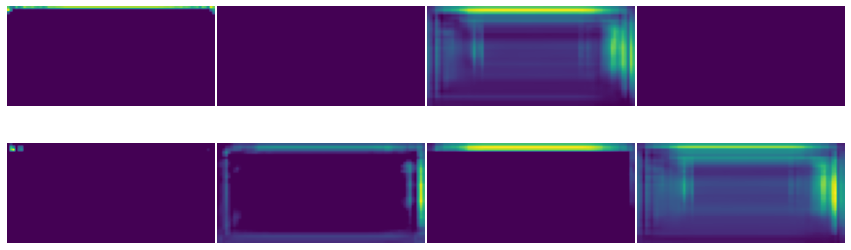

28 Layer:  up_sampling2d_5 Layer shape:  (1, 74, 154, 16)


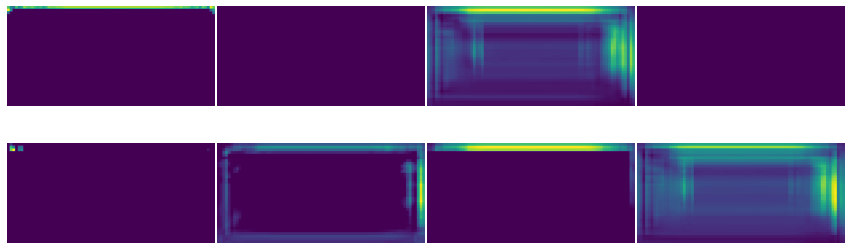

29 Layer:  Deconv6 Layer shape:  (1, 77, 157, 16)


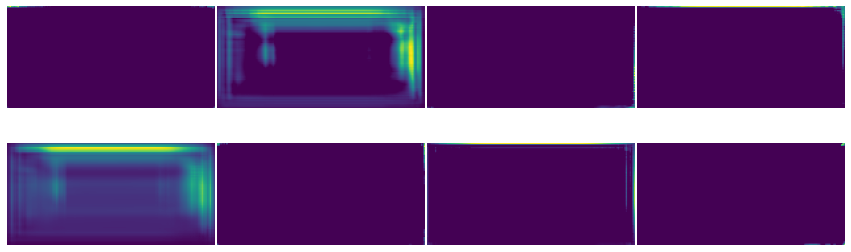

In [ ]:
for i in range(0, len(extracted_features) -1):
  print(i, 'Layer: ', layer_names[i], 'Layer shape: ', extracted_features[i].shape)
  plt.figure(figsize=(15, 5))
  if (extracted_features[i].ndim == 4):
    features = extracted_features[i]
    imgs = features[0, :, :]
    if (i == 0):
      for n in range(2):
        ax = plt.subplot(1, 3, n + 1)
        plt.imshow(imgs[:, :, n+1])
        plt.axis('off')
        plt.subplots_adjust(wspace=0.01, hspace=0.01)
    else:
      imgs = extracted_features[i][0, :, :]
      for n in range(8):
        ax = plt.subplot(2, 4, n+1)
        plt.imshow(imgs[:, :, n])
        plt.axis("off")
        plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.show()


#Batch size and epochs

In [ ]:
batch_size = 32
epochs = 10
pool_size = (2, 2)
input_shape = X_train.shape[1:]
print(input_shape)

(80, 160, 3)


#Model

In [ ]:
def create_model(input_shape, pool_size):
    # Create the actual neural network here
    model = Sequential()
    # Normalizes incoming inputs. First layer needs the input shape to work
    model.add(BatchNormalization(input_shape=input_shape))

    # Below layers were re-named for easier reading of model summary; this not necessary
    # Conv Layer 1
    model.add(Conv2D(16, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(32, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(32, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(64, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(16, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
    model.add(Conv2DTranspose(1, (2, 2), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model

#Compile model

In [ ]:
model = create_model(input_shape, pool_size)

# Using a generator to help the model use less data
# Channel shifts help with shadows slightly
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')
model.save('Custom_CNN.h5')

<ipython-input-7-dc3480f22f84>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,


Epoch 1/10
358/358 [==============================] - 668s 2s/step - loss: 0.0365 - val_loss: 0.0156
Epoch 2/10
358/358 [==============================] - 677s 2s/step - loss: 0.0152 - val_loss: 0.0118
Epoch 3/10
358/358 [==============================] - 685s 2s/step - loss: 0.0128 - val_loss: 0.0111
Epoch 4/10
358/358 [==============================] - 680s 2s/step - loss: 0.0115 - val_loss: 0.0095
Epoch 5/10
358/358 [==============================] - 680s 2s/step - loss: 0.0106 - val_loss: 0.0086
Epoch 6/10
102/358 [=======>......................] - ETA: 7:56 - loss: 0.0098

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

In [ ]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/CNN.h5')

#Plot training loss and validation loss

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

NameError: ignored

#Predicted label

1/1 [==============================] - 1s 549ms/step


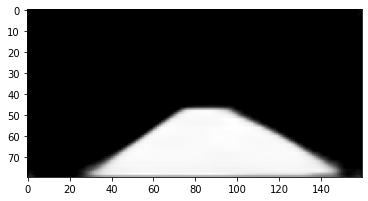

In [ ]:
img = X_val[280]
img = img[None,:,:,:]
ypred = model.predict(img)[0]
# ypred = np.where(ypred<0.5,0,1)*255

plt.imshow(np.array(ypred.reshape(80,160)), cmap='gray')

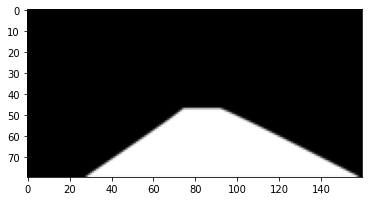

In [ ]:

plt.imshow(np.array(y_val[280].reshape(80,160)), cmap='gray')

#Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mask1_ = np.array(ypred.reshape(80,160))
mask2_ = np.array(y_val[25].reshape(80,160))
mse_ = mean_squared_error(mask1_, mask2_)
print(mse_)

0.032058474997517454


In [ ]:
y_pred_ = model.predict(X_val)
y_pred_ = np.where(y_pred_<0.5,0,1)*255
print(np.array(y_pred_).shape)
print(np.array(y_val).shape)

40/40 [==============================] - 1s 19ms/step
(1277, 80, 160, 1)
(1277, 80, 160, 1)


In [ ]:
mask1 = np.array(y_pred_)
mask2 = np.array(y_val)

y_pred_flatten = np.array(y_pred_.reshape(1277, 1*80*160))
y_val_flatten = np.array(y_val.reshape(1277, 1*80*160))

# Tính tổng số pixel giao nhau giữa hai mask
intersection = np.sum(np.logical_and(mask1, mask2))

# Tính tổng số pixel của hai mask
union = np.sum(np.logical_or(mask1, mask2))

# Tính IoU
iou = intersection / union

#MSE
mse = mean_squared_error(y_true=y_val_flatten, y_pred=y_pred_flatten)



In [ ]:
TP =  np.logical_and(mask1, mask2)
union = np.logical_or(mask1, mask2)
TN = np.logical_and(np.logical_not(union), np.logical_not(mask2))
FN = np.logical_xor(union, mask1)
FP = np.logical_xor(union, mask2)

acc = (np.sum(TP) + np.sum(TN)) / (np.sum(TP) + np.sum(TN) + np.sum(FP) + np.sum(FN))
prec = (np.sum(TP)) / (np.sum(TP) + np.sum(FP))
recall = (np.sum(TP)) / (np.sum(TP) + np.sum(FN))
f1 = 2*(prec*recall) / (prec + recall)
print("Accuracy: ",acc)
print("Precision: ", "{:.2f}".format(prec))
print("Recall: ","{:.2f}".format(recall) )
print("F1: ", "{:.2f}".format(f1))
print("IoU: ", "{:.2f}".format(iou))
print("MSE: ", "{:.2f}".format(mse))

Accuracy:  0.9779728489624119
Precision:  0.98
Recall:  0.89
F1:  0.93
IoU:  0.87
MSE:  9953.01


In [ ]:
print(TP.tolist())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Predict image in training set

1/1 [==============================] - 1s 741ms/step


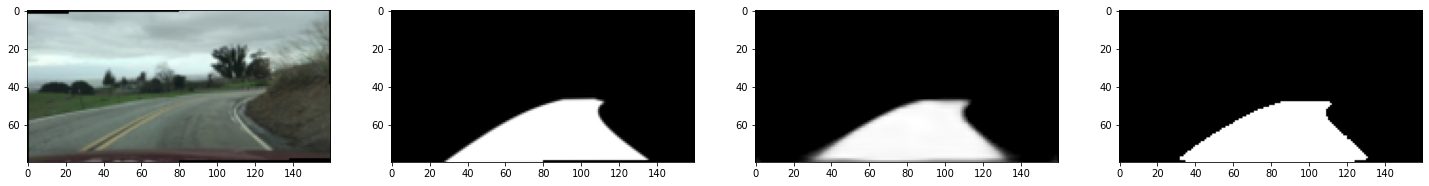

In [ ]:
block_img = []
image = X_val[500]
image_ = image[None,:,:,:]
image_pred = model.predict(image_)[0]
image_pred_255 = np.where(image_pred<0.5,0,1)*255
image_true = np.array(y_val[500]).reshape(80, 160)
# plt.imshow(np.array(image))
block_img.append(np.array(image))
block_img.append(image_true)
block_img.append(np.array(image_pred).reshape(80, 160))
block_img.append(np.array(image_pred_255).reshape(80, 160))

_, axs = plt.subplots(1, 4, figsize=(25, 25))
axs = axs.flatten()
for img, ax in zip(block_img, axs):
    ax.imshow(img, cmap='gray')
plt.show()

1/1 [==============================] - 0s 41ms/step


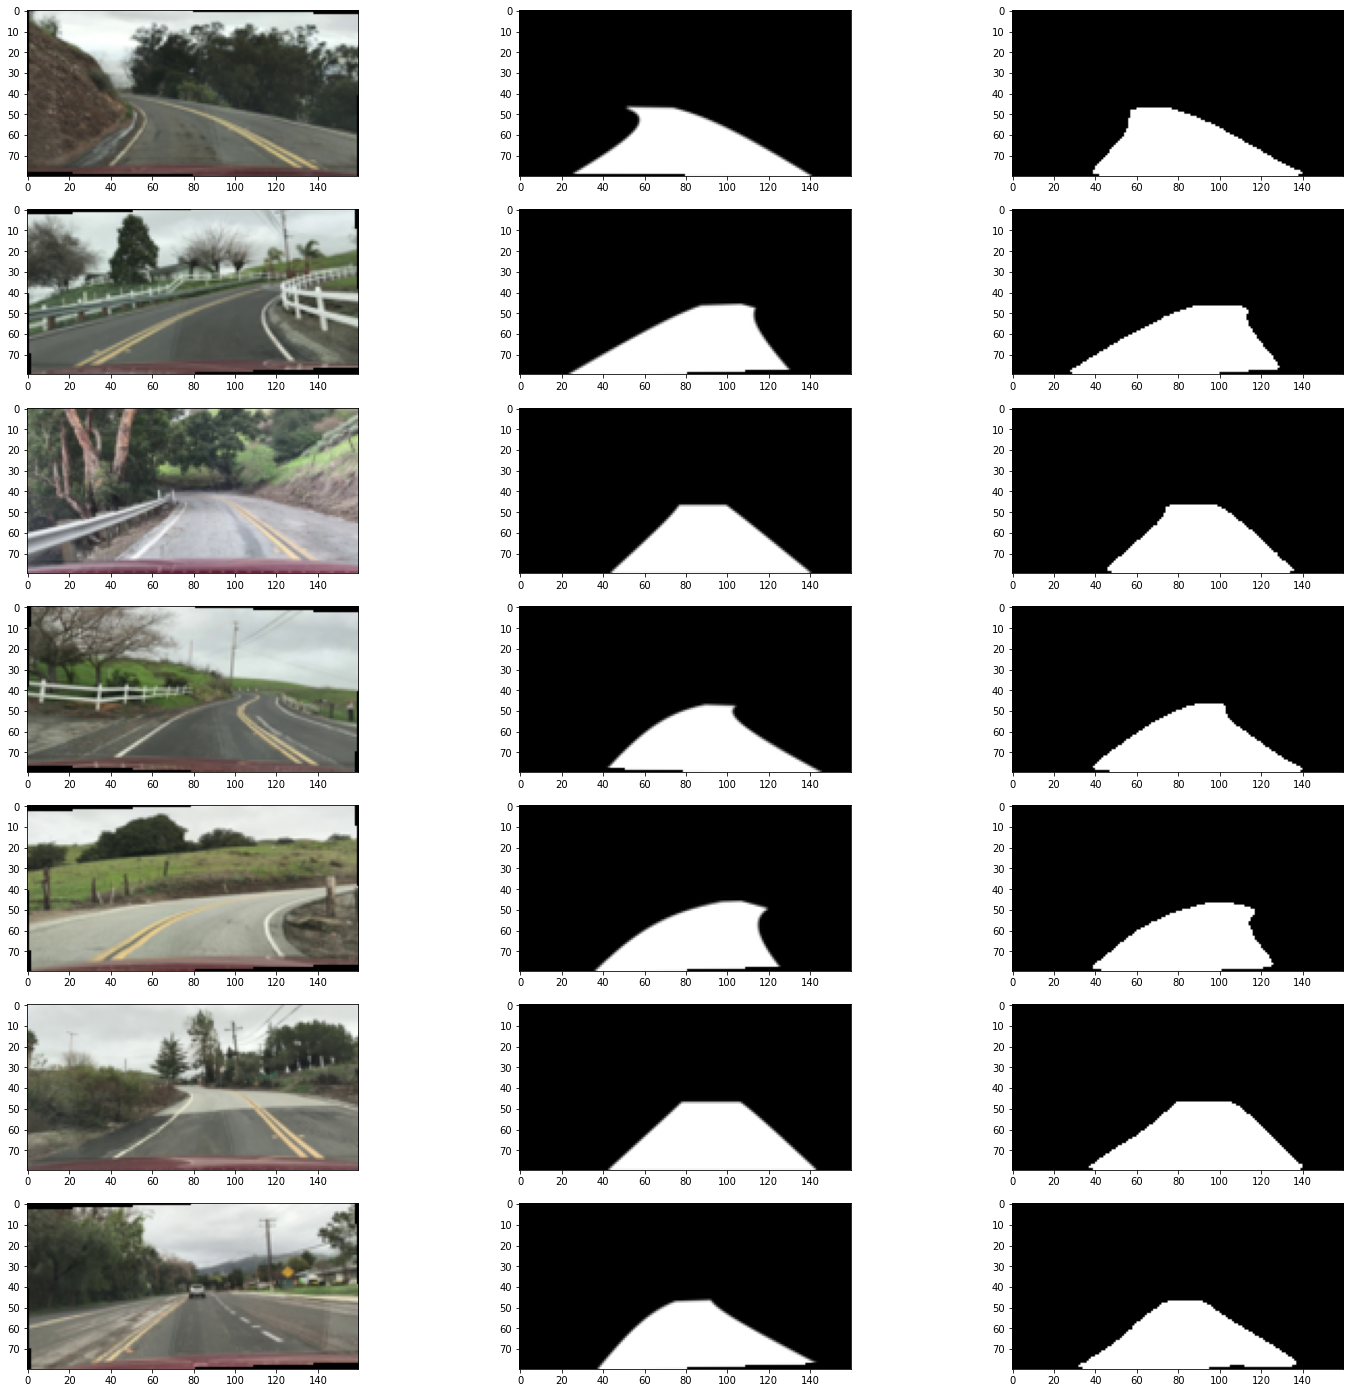

In [ ]:
imgs=[]
for i in range(3,11):
    imgs.append(np.array(X_val[i]))
    
    imgs.append(np.array(y_val[i].reshape(80,160)))

    img= X_val[i]
    img=img[None,:,:,:]
    ypr=model.predict(img)[0] 
    ypr=np.where(ypr<0.5,0,1)*255
    imgs.append(np.array(ypr.reshape(80,160)))
    
_, axs = plt.subplots(7, 3, figsize=(25, 25))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img, cmap='gray')
plt.show()

In [ ]:
layer = model.layers
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters)

Conv1 [[[[ 0.2177319   0.06692526 -0.14916295  0.095195   -0.1353953
     0.07106786 -0.22734158  0.09256871]
   [ 0.06835192 -0.06144343 -0.09677748  0.21405947 -0.14462928
     0.06076778  0.18493961  0.18588151]
   [-0.22421001  0.01981657 -0.18274659 -0.230453   -0.11523875
    -0.03712076 -0.21471134 -0.22263089]]

  [[-0.1406428   0.10676301 -0.15329036 -0.21817654  0.1314965
    -0.20875952  0.01172833  0.0684916 ]
   [-0.13486916  0.06405096 -0.01191474 -0.14009479  0.08275028
     0.24574262  0.11049634 -0.00463432]
   [-0.0777095  -0.05547561 -0.15965158  0.01228204 -0.06625755
    -0.04779286 -0.00708455 -0.13515835]]

  [[ 0.06817961  0.12432795 -0.20048706 -0.03032023 -0.16504517
    -0.12203673  0.05676824  0.08958056]
   [-0.09929281 -0.18949027  0.17203517 -0.20481385 -0.04340095
    -0.14785059  0.20353556 -0.22873995]
   [ 0.11066206 -0.11455615 -0.10037243 -0.15386769  0.14533167
    -0.07264475 -0.049151   -0.19768085]]]


 [[[ 0.14195013  0.24191856  0.04184628 -0.

#Visualize filters

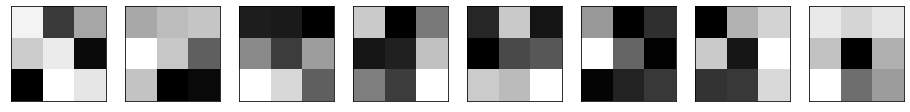

In [ ]:
fig1=plt.figure(figsize=(16, 20))
columns = 8
rows = 1
n_filters = columns
for i in range(1, n_filters + 1):
  f = filters[:, :, :, i - 1]
  fig1 = plt.subplot(rows, columns, i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:, :, 0], cmap='gray')

plt.show()

#Predict image

1/1 [==============================] - 0s 19ms/step


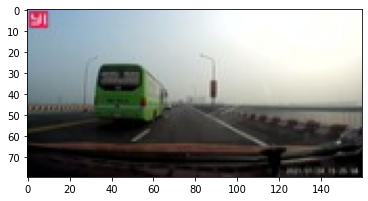

In [ ]:
from tensorflow.keras.utils import img_to_array

img = cv2.imread('/content/DRIVING IN HANOI CITY 2021 - The ring road system of Hanoi  _Moment3 (1).jpg')
img = cv2.resize(img, (160, 80))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

feature_output = model.predict(img)

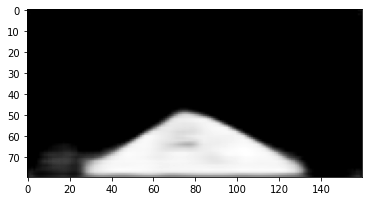

In [ ]:
plt.imshow(feature_output[0,  :,  :,  0], cmap='gray')

#Install scipy

In [ ]:
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.6 MB 6.5 MB/s 
  Created wheel for scipy: filename=scipy-1.1.0-cp38-cp38-linux_x86_64.whl size=41840195 sha256=e5ce4f32e84bb49edc68a22a0405a74bc28eb5ba9ba205e24cefe12d83f0fa00
  Stored in directory: /root/.cache/pip/wheels/29/a9/5e/9e4eddde37a1e15cf5cb404ba197df482cc39ffbfef91ec337
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.1.0 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have sci

#Install moviepy

In [ ]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 98.8 MB/s 


#Predict in video

    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  small_img = imresize(image, (80, 160, 3))



1/1 [==============================] - 0s 222ms/step


    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  lane_image = imresize(lane_drawn, (720, 1280, 3))



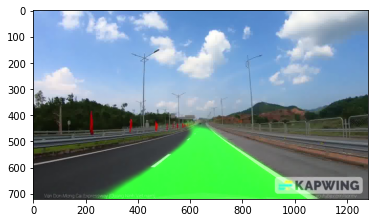

In [ ]:
import numpy as np
import cv2
from scipy.misc import imresize
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from keras.models import load_model
import matplotlib.pyplot as plt

# Load Keras model
model = load_model('/content/drive/MyDrive/CNN.h5')

# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """

    # Get image ready for feeding into model
    small_img = imresize(image, (80, 160, 3))
    small_img = np.array(small_img)
    small_img = small_img[None,:,:,:]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255
    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = imresize(lane_drawn, (720, 1280, 3))

    


    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()

    return result

lanes = Lanes()

img = cv2.imread('/content/2208.jpg')

result = road_lines(img)

# Where to save the output video
vid_output = 'Test_Output.mp4'

clip1 = VideoFileClip("/content/2208.mp4")

vid_clip = clip1.fl_image(road_lines)
vid_clip.write_videofile(vid_output, audio=False)